<a href="https://colab.research.google.com/github/mehtataral/Apple_stock/blob/main/Overview_of_Colaboratory_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-01  185.149994  186.699997  183.600006  184.449997  184.449997   
2020-01-02  185.000000  194.699997  184.600006  193.750000  193.750000   
2020-01-03  192.899994  195.649994  189.250000  191.100006  191.100006   
2020-01-06  191.000000  191.000000  185.050003  185.649994  185.649994   
2020-01-07  187.000000  189.399994  182.300003  184.699997  184.699997   
...                ...         ...         ...         ...         ...   
2023-04-19  473.000000  475.500000  467.850006  469.399994  469.399994   
2023-04-20  473.700012  479.700012  469.399994  476.799988  476.799988   
2023-04-21  476.700012  476.700012  467.200012  471.200012  471.200012   
2023-04-24  471.200012  476.000000  468.299988  475.200012  475.200012   
2023-04-25  475.200012  476.399994  471.899

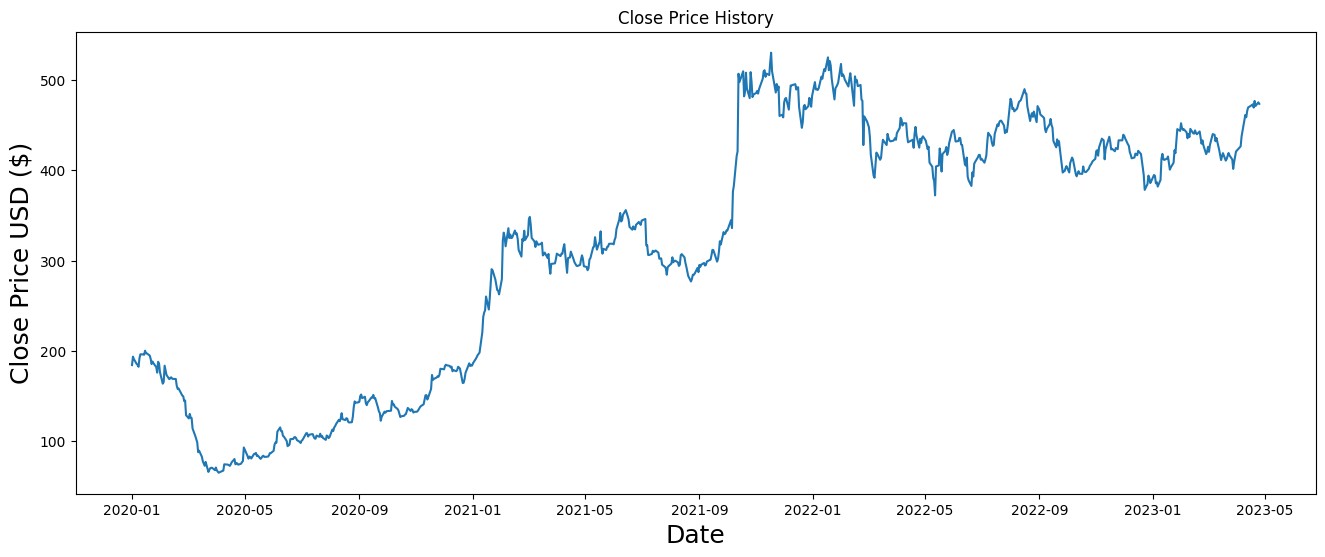

--------------------------------------------------------
                 Close
Date                  
2020-01-01  184.449997
2020-01-02  193.750000
2020-01-03  191.100006
2020-01-06  185.649994
2020-01-07  184.699997
...                ...
2023-04-19  469.399994
2023-04-20  476.799988
2023-04-21  471.200012
2023-04-24  475.200012
2023-04-25  473.549988

[823 rows x 1 columns]
********************************************************
782
[[0.25631922]
 [0.27632568]
 [0.27062493]
 [0.25890069]
 [0.25685703]
 [0.25223189]
 [0.27256102]
 [0.28191889]
 [0.28170376]
 [0.28084328]
 [0.29052382]
 [0.28450036]
 [0.28396256]
 [0.27901472]
 [0.27127027]
 [0.25879315]
 [0.26481658]
 [0.26072925]
 [0.25147895]
 [0.23835645]
 [0.26406366]
 [0.26008387]
 [0.23943207]
 [0.21200387]
 [0.21598363]
 [0.25481336]
 [0.24427234]
 [0.23297838]
 [0.22286756]
 [0.22469612]
 [0.22727759]
 [0.22415831]
 [0.22329783]
 [0.22329783]
 [0.2071636 ]
 [0.19952672]
 [0.20049477]
 [0.18360759]
 [0.18199416]
 [0.17048509]

2/2 [==============================] - 1s 12ms/step


<ipython-input-5-45bfbdadaa91>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


22.428487967553355
####################################################


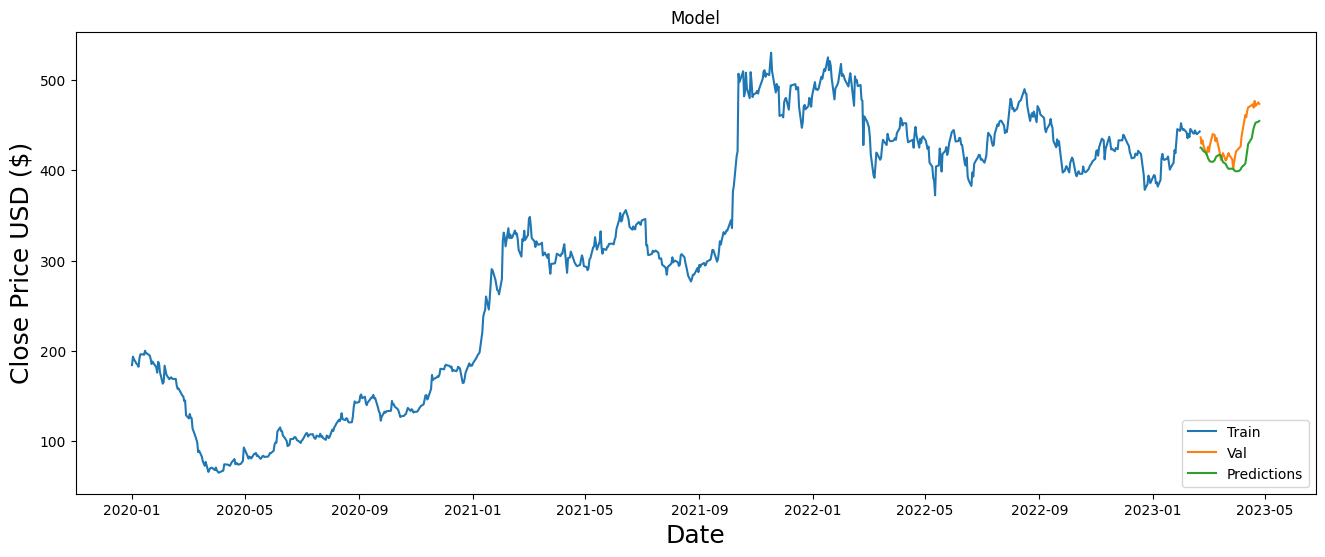

In [5]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

yf.pdr_override()

# download dataframe
df = pdr.get_data_yahoo("TATAMOTORS.NS", start="2020-01-01", end="2023-04-26")
print(df)


plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
print("--------------------------------------------------------")
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
print(data)
print("********************************************************")
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
print("####################################################")
plt.show()

